# Results and Analyses:
# **Constrained Parameter Inference As A Principle For Learning**

In [83]:
%env CUDA_VISIBLE_DEVICES=-1
import yaml
import numpy as np
import matplotlib.pyplot as plt
import copi
import torch
import torchvision
import os
import yaml

env: CUDA_VISIBLE_DEVICES=-1


## Results, Figure 1: Performance on MNIST and CIFAR10
Loading/plotting of performance and loss trends for 5 randomly seeded networks

In [90]:
# Loading the data from a particular results folder
dataset = "CIFAR10" # Change to 'MNIST'/'CIFAR10' to plot each
path = "./results/" + dataset
models = os.listdir(path)
seeds = [1,2,3,4,5]
filename = "sim_params.yml"
models = sorted(models)

models_data = {}
for model in models:
    modelpath = "./results/" + dataset + "/" + model + "/"
    yml_data = []
    for s in seeds:
        filepath = modelpath + str(s) + "/" + filename
        with open(filepath, "r") as stream:
            yml_data.append(yaml.safe_load(stream))
    models_data[model] = yml_data


In [91]:
models

['bp_adam', 'bp_decorr_boosted', 'copi_bp_boosted', 'copi_fa_boosted']

In [92]:
# Getting mean and std of peak performance and epoch at which this is reached
for metric in ['acc']: #, 'loss']:
    plt.figure(figsize=(4,3), dpi=20)
    for train_test in ['train', 'test']:
        for indx, model in enumerate(models):
            data = [models_data[model][i]['performances'][train_test][metric] for i in range(len(seeds))]

            print(metric + "," + train_test + "," + model)
            print("mean max value: " + str(np.mean(np.max(data, axis=1))) + ", std: " + str(np.std(np.max(data, axis=1))))
            print("argmax mean: " + str(np.mean(np.argmax(data, axis=1))) + ", std: " + str(np.std(np.argmax(data, axis=1)))) 

acc,train,bp_adam
mean max value: 0.9998319996595383, std: 6.144929051326262e-05
argmax mean: 98.8, std: 0.7483314773547882
acc,train,bp_decorr_boosted
mean max value: 1.0, std: 0.0
argmax mean: 19.6, std: 1.019803902718557
acc,train,copi_bp_boosted
mean max value: 1.0, std: 0.0
argmax mean: 18.8, std: 1.469693845669907
acc,train,copi_fa_boosted
mean max value: 1.0, std: 0.0
argmax mean: 48.4, std: 7.964923100695951
acc,test,bp_adam
mean max value: 0.5619399854540825, std: 0.0023371777526760723
argmax mean: 53.0, std: 26.825361134568162
acc,test,bp_decorr_boosted
mean max value: 0.5616199845075607, std: 0.004665361934780484
argmax mean: 12.4, std: 1.0198039027185568
acc,test,copi_bp_boosted
mean max value: 0.5729999845325946, std: 0.0016198772124578912
argmax mean: 13.0, std: 2.756809750418044
acc,test,copi_fa_boosted
mean max value: 0.5206599852144719, std: 0.0022887553189966346
argmax mean: 8.0, std: 1.0954451150103321


<Figure size 80x60 with 0 Axes>

In [93]:
# Getting mean and std of peak performance and epoch at which this is reached
for metric in ['acc']: #, 'loss']:
    plt.figure(figsize=(4,3), dpi=20)
    for train_test in ['train', 'test']:
        for indx, model in enumerate(models):
            data = [models_data[model][i]['performances'][train_test][metric] for i in range(len(seeds))]

            meanmaxval = np.mean(np.max(data, axis=1))
            print(metric + "," + train_test + "," + model)
            print("argmax mean: " + str(np.mean(np.argmax(data >= 0.99*meanmaxval, axis=1))) + ", std: " + str(np.std(np.argmax(data >= 0.99*meanmaxval, axis=1)))) 

acc,train,bp_adam
argmax mean: 53.0, std: 0.8944271909999159
acc,train,bp_decorr_boosted
argmax mean: 8.0, std: 0.0
acc,train,copi_bp_boosted
argmax mean: 7.0, std: 0.0
acc,train,copi_fa_boosted
argmax mean: 13.0, std: 0.0
acc,test,bp_adam
argmax mean: 36.4, std: 23.40598214132447
acc,test,bp_decorr_boosted
argmax mean: 8.0, std: 4.242640687119285
acc,test,copi_bp_boosted
argmax mean: 9.8, std: 1.6
acc,test,copi_fa_boosted
argmax mean: 6.0, std: 0.0


<Figure size 80x60 with 0 Axes>

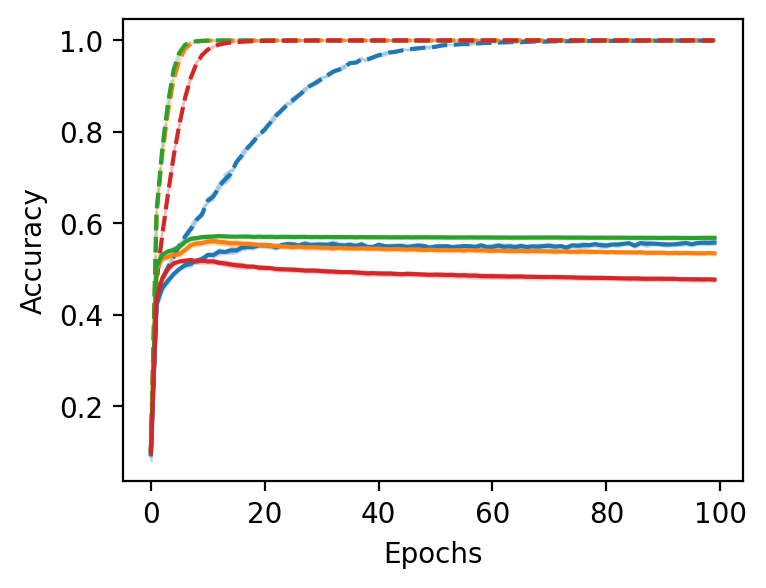

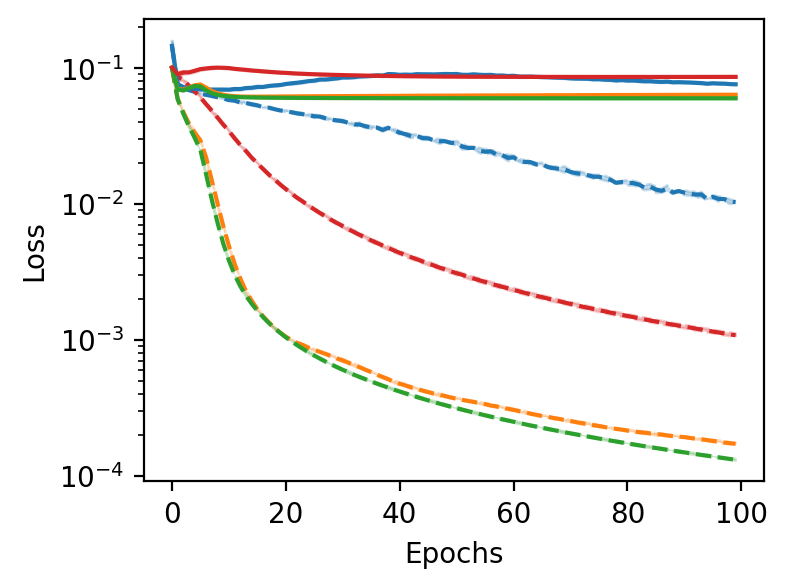

In [94]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for metric in ['acc', 'loss']:
    plt.figure(figsize=(4,3), dpi=200)
    for train_test in ['train', 'test']:
        for indx, model in enumerate(models):
            data = [models_data[model][i]['performances'][train_test][metric] for i in range(len(seeds))]
            meancurve = np.mean(np.asarray(data).transpose()[1:], axis=1)
            stdcurve = np.std(np.asarray(data).transpose()[1:], axis=1) 
            plt.plot(meancurve, color=cycle[indx], label=model, alpha=1.0, ls='-' if train_test=='test' else '--')
            ax = plt.gca()
            ax.fill_between(range(len(meancurve)), meancurve - stdcurve, 
                                                    meancurve + stdcurve,
                                                    ls='-' if train_test=='test' else '--',
                                                    alpha=0.25,
                                                    color=cycle[indx])

        # plt.title(model)
    if metric == 'loss':
        plt.yscale('log')
    if metric =='acc' and dataset == "MNIST":
        plt.ylim([0.85, 1.01])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy' if metric == 'acc' else 'Loss')
    # plt.legend()
    plt.show()

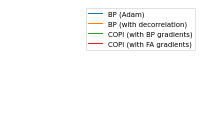

In [9]:
legend_dict = {'bp_adam': 'BP (Adam)',
                'bp_decorr_boosted': 'BP (with decorrelation)',
                'copi_bp_boosted': 'COPI (with BP gradients)',
                'copi_fa_boosted': 'COPI (with FA gradients)'}
fig = plt.figure(figsize=(5,3), dpi=50)
for indx in range(len(models)):
  plt.plot([0],[0], color=cycle[indx], label=legend_dict[models[indx]])
plt.axis('off')
plt.legend()

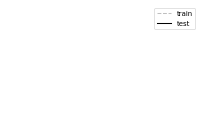

In [10]:
fig = plt.figure(figsize=(5,3), dpi=50)
plt.plot([0],[0], color='k', ls='--', label='train', alpha=0.25)
plt.plot([0],[0], color='k', ls='-', label='test')
plt.legend()
plt.axis('off')
plt.show()

## Results, Figure 2: Decorrelation Impact, Receptive Field Readout, and Network Compression

### Plotting COPI Decorrelation vs ZCA

In [11]:
# ZCA Computation
def zca_whiten_data(data):
    ZCAMatrix = zca_whitening_matrix(data.transpose(0,1) - torch.mean(data.transpose(0,1), axis=0))
    data_transformed = np.dot(ZCAMatrix, data.transpose(0,1) - torch.mean(data.transpose(0,1), axis=0))

    return data_transformed.transpose()

def zca_whitening_matrix(X):
    """
    Function to compute ZCA whitening matrix (aka Mahalanobis whitening).
    INPUT:  X: [M x N] matrix.
        Rows: Variables
        Columns: Observations
    OUTPUT: ZCAMatrix: [M x M] matrix
    """
    # Covariance matrix [column-wise variables]: Sigma = (X-mu)' * (X-mu) / N
    sigma = np.cov(X, rowvar=True) # [M x M]
    # Singular Value Decomposition. X = U * np.diag(S) * V
    U,S,V = np.linalg.svd(sigma)
        # U: [M x M] eigenvectors of sigma.
        # S: [M x 1] eigenvalues of sigma.
        # V: [M x M] transpose of U
    # Whitening constant: prevents division by zero
    epsilon = 1e-8
    # ZCA Whitening matrix: U * Lambda * U'
    ZCAMatrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T)) # [M x M]

    return ZCAMatrix

Loading the dataset of interest

In [12]:
fltype = torch.float32
torch.set_default_dtype(fltype)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
validation = False

x_train, y_train, y_train_onehot, x_test, y_test, y_test_onehot = copi.load_dataset(torchvision.datasets.MNIST, device, fltype, validation)

/scratch/big/home/nasahm/Repositories/COPI/copi/utils.py:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train); x_test = torch.tensor(x_test);


Loading the model to be compared to ZCA

In [13]:
# Load COPI model
# Load config, and seed
model_path = "results/MNIST/copi_bp_boosted/1/"
with open(model_path + "sim_params.yml", 'r') as stream:
    sim_params = yaml.safe_load(stream)
# Run networks
net = copi.NN_Builder(sim_params)
net.load_state_dict(torch.load(model_path + "model_params.pth", map_location=torch.device('cpu')))
_ = net.to(device)

Processing the data using the model and ZCA

In [14]:
zca_processed_x_train = zca_whiten_data(x_train)
copi_processed_x_train = (x_train @ net.decor_layers[0].weight.transpose(0,1))

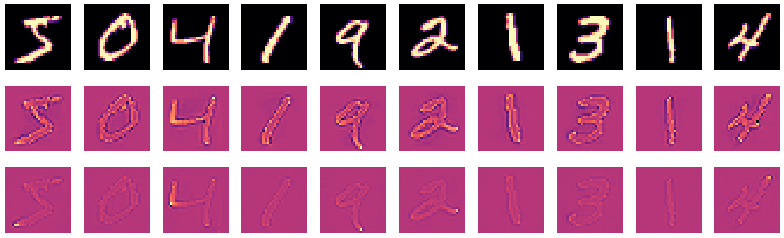

In [15]:
# Number of examples to be plot
nb_examples = 10

# Collecting the set of data to be plotted
data = [(x_train - 0.5).detach().numpy(), copi_processed_x_train.detach().numpy(), zca_processed_x_train]

# Plotting data in a 10x3 grid 
plt.figure(figsize=(nb_examples*2, 2*3), dpi=50)
for e in range(nb_examples):
  for indx, d in enumerate(data):
    plt.subplot(len(data), nb_examples, e+indx*nb_examples+1)
    # Setting the colormap max/min as symmetrical about zero
    minmax = np.max(np.abs(d[:nb_examples]))
    plt.imshow(d[e].reshape(28,28), cmap='magma', vmin=-minmax, vmax=minmax, interpolation='None')
    plt.axis('off')
plt.show()

### Network Layer RFs from MNIST

In [16]:
# Collecting neural responses at every layer of the MNIST Network
x_vals, a_vals, output = net.forward(x_train)

Layer: 2


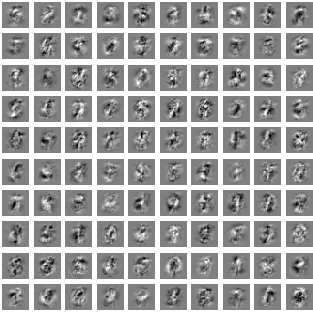

In [20]:
# Layer whose RFs we wish to infer (indexed from zero)
layer_indx = 1
nb_examples = 100

input_data = copi_processed_x_train.detach().clone().numpy() 
var = copi_processed_x_train.detach().clone().numpy()
var = np.nanmean(var**2, axis=0)
epsilon = 1e-1
var[np.abs(var) < epsilon] = epsilon

layer_activities = a_vals[layer_indx].detach().numpy()
lin_approx = (1/(len(layer_activities)))*np.einsum('ni,nj->ij', input_data, layer_activities)
lin_approx = lin_approx / var [:, np.newaxis]

size = (np.sqrt(nb_examples)*2, np.sqrt(nb_examples)*2)

print('Layer: ' + str(layer_indx+1))
plt.figure(figsize=size, dpi=20)
for e in range(np.min([lin_approx.shape[1], nb_examples])):
  plt.subplot(int(np.sqrt(nb_examples)), int(np.sqrt(nb_examples)), e+1)
  plt.imshow((lin_approx[:,e].reshape(28,28) / np.max(np.abs(lin_approx[:,e]))), cmap='gray', vmin=-1, vmax=1, interpolation='none')
  plt.axis('off')
plt.show()


### Network Compression

In [21]:
dataset = 'MNIST'

seeds = [1,2,3,4,5]
model_source_path = "results/" + dataset + "/copi_bp_boosted/"
source_layers = [6,5,4,3,2,1,0]
target_layer = 7

if dataset == 'CIFAR10':
    source_layers = [4,3,2,1,0]
    target_layer = 5

fltype = torch.float32
torch.set_default_dtype(fltype)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
validation = False

tv_dataset_loader = torchvision.datasets.MNIST
if dataset == 'CIFAR10': tv_dataset_loader = torchvision.datasets.CIFAR10
x_train, y_train, y_train_onehot, x_test, y_test, y_test_onehot = copi.load_dataset(tv_dataset_loader, device, fltype, validation)

In [22]:
test_performances = [[] for s in source_layers] 
train_performances = [[] for s in source_layers]



for s in seeds:
    # Load COPI model
    # Load config, and seed
    model_path = model_source_path + str(s) + "/"
    with open(model_path + "sim_params.yml", 'r') as stream:
        sim_params = yaml.safe_load(stream)
    # Run networks
    net = copi.NN_Builder(sim_params)
    net.load_state_dict(torch.load(model_path + "model_params.pth", map_location=torch.device('cpu')))
    _ = net.to(device)
    
    # Collecting neural responses at every layer of the MNIST Network
    x_vals, a_vals, output = net.forward(x_train)
    x_test_vals, a_test_vals, output_test = net.forward(x_test)

    for s_indx, source_layer in enumerate(source_layers):
        # Only infer if we are at least one matrix away
        if source_layer != (target_layer - 1):
            source_data = x_vals[source_layer].detach().clone()
            target_data = a_vals[target_layer-1].detach().clone()

            # Use correlation to form a linear approximation of the transformation between the start and end layer
            lin_approx_w = (1/(len(source_data)))*torch.einsum('ni,nj->ij', target_data, source_data)
            # This must be rescaled by the inverse of the start layer node variances
            var = source_data.clone()
            var[var == 0] = 1e-4
            var = torch.mean(var**2, axis=0)
            lin_approx_w = lin_approx_w / var

            train_output = net.act_func(source_data @ lin_approx_w.transpose(0,1))
            test_output = net.act_func(x_test_vals[source_layer].detach().clone() @ lin_approx_w.transpose(0,1)) 
        else:
            train_output = output
            test_output = output_test

        # Measure accuracy
        train_acc, train_loss = copi.perf_check(train_output, y_train, y_train_onehot)
        # Measure accuracy
        test_acc, test_loss = copi.perf_check(test_output, y_test, y_test_onehot)
        
        train_performances[s_indx].append(train_acc) 
        test_performances[s_indx].append(test_acc)


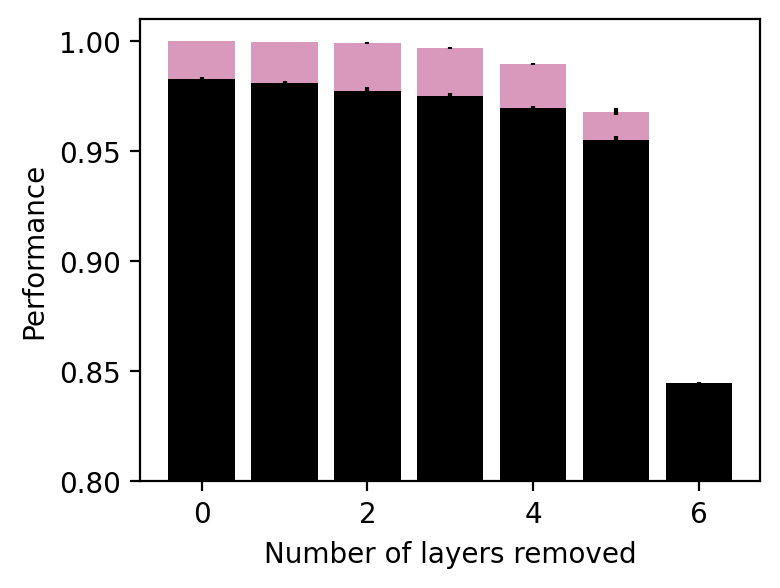

In [23]:
plt.figure(figsize=(4,3), dpi=200)
cmap = plt.get_cmap("magma")

plt.bar(range(0, len(train_performances)), np.mean(train_performances, axis=1), color=cmap(125), alpha=0.5, yerr=np.std(train_performances, axis=1))
plt.bar(range(0, len(test_performances)), np.mean(test_performances, axis=1), color='k', yerr=np.std(test_performances, axis=1))
if dataset == 'CIFAR10': plt.ylim([0.35, 1.01])
else: plt.ylim([0.80, 1.01]) 
plt.xlabel('Number of layers removed')
plt.ylabel('Performance')
# plt.yscale('log')
ax = plt.gca()
plt.show()